# data collection 

In [50]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd
import seaborn as sns

In [51]:
data = pd.read_csv(r'../song_db.csv',low_memory = False)
data.head(5)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,1,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,1,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,1,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,1,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,1,Venom,NaN,NaN


In [40]:
# data.info()

# removing all non-numeric data attributes

In [41]:
# choose all the non-numeric type attributes
non_numeric_attributes = data.select_dtypes(exclude='number').columns.tolist()
non_numeric_attributes

['type', 'id', 'uri', 'track_href', 'analysis_url', 'song_name', 'title']

In [42]:
# dropping respective columns
data.drop(columns = non_numeric_attributes, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  duration_ms       42305 non-null  int64  
 12  time_signature    42305 non-null  int64  
 13  genre             42305 non-null  int64  
 14  Unnamed: 0        20780 non-null  float64
dtypes: float64(10), int64(5)
memory usage: 4.8 MB


# for feature selection

In [43]:
# Separate features and target variable
x = data.drop('genre', axis=1)  
y = data['genre']
# 'genre' is our target variable
# x contains alll features expect genre
# y is genre

In [44]:
# Append target variable to the features for correlation analysis
df = x.copy()
df['genre'] = y

In [45]:
# Compute the correlation matrix
corr_matrix = df.corr()

In [46]:
# Get correlations with the target variable
corr_with_target = corr_matrix['genre'].drop('genre')

In [47]:
# Select features with a correlation threshold (e.g., absolute value above 0.2)
corr_threshold = 0.2
selected_features = corr_with_target[abs(corr_with_target) > corr_threshold].index

In [48]:
# Print selected features and their correlations
print("Selected Features based on correlation with genre:")
print(corr_with_target[abs(corr_with_target) > corr_threshold])

Selected Features based on correlation with genre:
danceability       -0.304660
energy              0.540976
loudness            0.320225
speechiness        -0.251465
acousticness       -0.345255
instrumentalness    0.361236
duration_ms         0.471400
Unnamed: 0          0.989712
Name: genre, dtype: float64


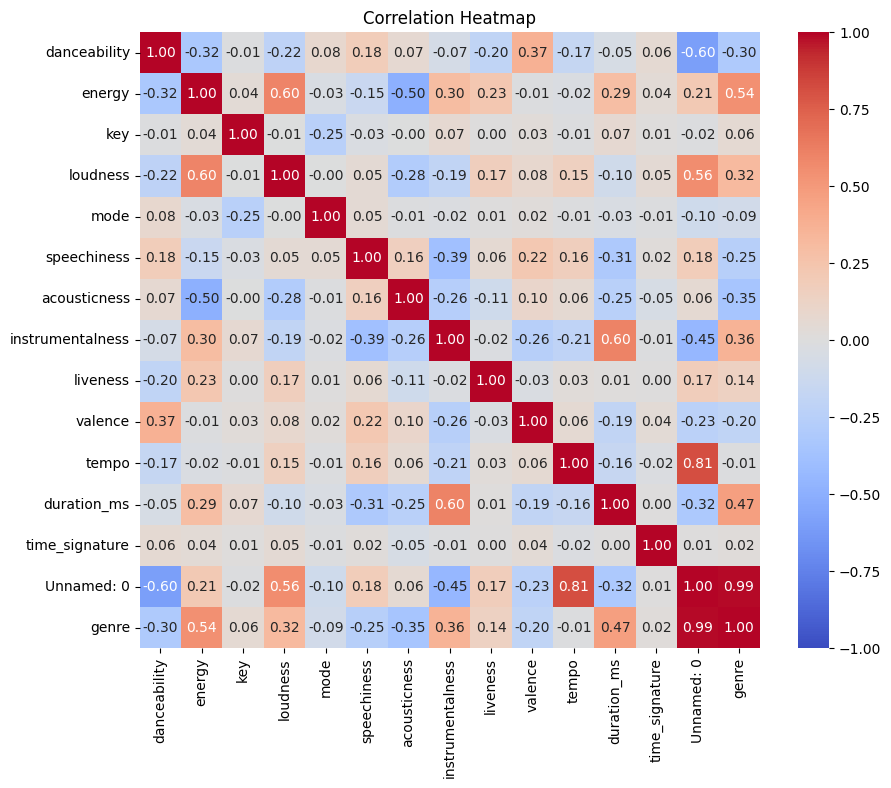

In [52]:
# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()
